###Library Installation

In [3]:
%%R
#library installation---
install.packages('ROSE')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('caret')



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘prodlim’, ‘ipred’, ‘recipes’




In [4]:
install.packages('randomForest')
install.packages('e1071')
install.packages('xgboost')
install.packages('ggplot2')
!tar xf library.tar.gz
.libPaths('usr/local/lib/R/site-library/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
#Data Import----
#setwd("D:/Practical/VIT/DS R/DataSET")
datax=read.csv("fetal_health.csv")
cat("No of rows initially:",nrow(datax))



No of rows initially: 2126

In [6]:
#Removal of Outliers---
datar=subset(datax,(fetal_movement<0.0075))
datar=subset(datar,(severe_decelerations==0))
datar=subset(datar,( mean_value_of_short_term_variability<3.2))
datar=subset(datar,(percentage_of_time_with_abnormal_long_term_variability<27.5))
datar=subset(datar,(mean_value_of_long_term_variability<20.1))
datar=subset(datar,(histogram_number_of_zeroes==0))
datar=subset(datar,(histogram_max<207))
datar=subset(datar,(histogram_number_of_peaks<12))
datar=subset(datar,(histogram_mode>(100.5) & histogram_mode<176.5))
datar=subset(datar,(histogram_mean>(95) & histogram_mean<175))
datar=subset(datar,(histogram_variance<57))
cat("\nNo of rows after removal of outliers ",nrow(datar))



No of rows after removal of outliers  991

## OverSampling using Rose

In [7]:
#ROSE----
library(ROSE)
library(caret)
p1=prop.table(table(datar$fetal_health))
print(p1)

Loaded ROSE 0.0-4


Loading required package: ggplot2

Loading required package: lattice




         1          2          3 
0.89707366 0.08779011 0.01513623 


In [8]:
data1=subset(datar,(fetal_health<3))
data2=subset(datar,(fetal_health==1 | fetal_health==3))
db1 <- ovun.sample(fetal_health ~ ., data = data1, method = "over", N = 1750, seed = 222)$data
print(table(db1$fetal_health))



  1   2 
889 861 


In [9]:
db2 <- ovun.sample(fetal_health ~ ., data = data2, method = "over", N = 1700, seed = 123)$data
print(table(db2$fetal_health))



  1   3 
889 811 


In [11]:
data_new=rbind(db1,db2[db2$fetal_health==3,])
cat("\nNo of rows after oversampling ",nrow(data_new))


No of rows after oversampling  2561

##K-Fold Validation


In [12]:
#Test-Train split----
set.seed(222)
shuffle_index <- sample(1:nrow(data_new))
data_new<-data_new[shuffle_index,]
id<-sample(2,nrow(data_new),prob=c(0.6,0.4),replace = TRUE)
datar_train<-data_new[id==1,]
datar_test<-data_new[id==2,]

#Decision Tree


In [13]:
#decision tree----
library(rpart)
library(rpart.plot)
set.seed(51)
id<-sample(2,nrow(datax),prob=c(0.8,0.2),replace = TRUE)

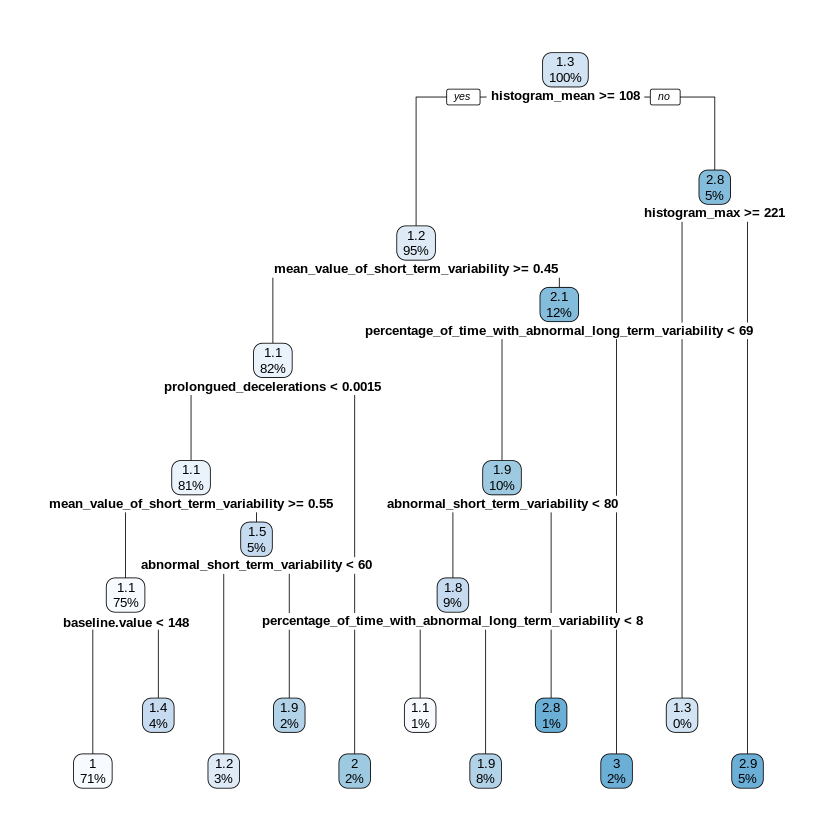

In [14]:
data_train<-datax[id==1,]
data_test<-datax[id==2,]
tree <- rpart(fetal_health~.,data=data_train)
rpart.plot(tree)


In [15]:
printcp(tree)
prun<-prune(tree, cp= tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"])



Regression tree:
rpart(formula = fetal_health ~ ., data = data_train)

Variables actually used in tree construction:
[1] abnormal_short_term_variability                       
[2] baseline.value                                        
[3] histogram_max                                         
[4] histogram_mean                                        
[5] mean_value_of_short_term_variability                  
[6] percentage_of_time_with_abnormal_long_term_variability
[7] prolongued_decelerations                              

Root node error: 664.67/1693 = 0.3926

n= 1693 

         CP nsplit rel error  xerror     xstd
1  0.305185      0   1.00000 1.00102 0.047602
2  0.264138      1   0.69481 0.77247 0.042577
3  0.046982      2   0.43068 0.43718 0.031665
4  0.032751      3   0.38369 0.39004 0.030726
5  0.026289      4   0.35094 0.35713 0.027678
6  0.026079      5   0.32465 0.34397 0.027087
7  0.025880      6   0.29857 0.34397 0.027087
8  0.017655      7   0.27269 0.32117 0.026140
9  0.

In [16]:
predicted <-predict(tree,data_test)
predicted<-as.integer(predicted)


###Confusion Matrix

In [17]:
cmd=table(data_test$fetal_health,predicted)
print(cmd)
print(confusionMatrix(cmd))



   predicted
      1   2   3
  1 348   1   1
  2  56   0   0
  3   3  16   8
Confusion Matrix and Statistics

   predicted
      1   2   3
  1 348   1   1
  2  56   0   0
  3   3  16   8

Overall Statistics
                                         
               Accuracy : 0.8222         
                 95% CI : (0.7828, 0.857)
    No Information Rate : 0.94           
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2396         
                                         
 Mcnemar's Test P-Value : 4.123e-15      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.8550  0.00000  0.88889
Specificity            0.9231  0.86538  0.95519
Pos Pred Value         0.9943  0.00000  0.29630
Neg Pred Value         0.2892  0.95491  0.99754
Prevalence             0.9400  0.03926  0.02079
Detection Rate         0.8037  0.00000  0.01848
Detection Prevalence   0.8083  0.12933  0.06236
Balanced

#Random Forest

In [18]:
#Random Forest----
library(randomForest)
datar_train$fetal_health=as.factor(datar_train$fetal_health)
rf <- randomForest(fetal_health~.,data = datar_train,ntree = 300,mtry = 8,proximity = TRUE,)
print(rf)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = fetal_health ~ ., data = datar_train,      ntree = 300, mtry = 8, proximity = TRUE, ) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 8

        OOB estimate of  error rate: 0.99%
Confusion matrix:
    1   2   3 class.error
1 546  16   0  0.02846975
2   0 541   0  0.00000000
3   0   0 519  0.00000000


In [19]:
attributes(rf)


$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

###Confusion Matrix

In [20]:
# Prediction & Confusion Matrix - train data
p1 <- predict(rf, datar_train)
confusionMatrix(p1, datar_train$fetal_health)
print(confusionMatrix(p1,datar_train$fetal_health))


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 561   0   0
         2   1 541   0
         3   0   0 519

Overall Statistics
                                     
               Accuracy : 0.9994     
                 95% CI : (0.9966, 1)
    No Information Rate : 0.3465     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 0.9991     
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9982   1.0000     1.00
Specificity            1.0000   0.9991     1.00
Pos Pred Value         1.0000   0.9982     1.00
Neg Pred Value         0.9991   1.0000     1.00
Prevalence             0.3465   0.3335     0.32
Detection Rate         0.3459   0.3335     0.32
Detection Prevalence   0.3459   0.3342     0.32
Balanced Accuracy      0.9991   0.9995     1.00

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 561   0   0
         2   1 541   0
         3   0   0 519

Overall Statistics
                                     
               Accuracy : 0.9994     
                 95% CI : (0.9966, 1)
    No Information Rate : 0.3465     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 0.9991     
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9982   1.0000     1.00
Specificity            1.0000   0.9991     1.00
Pos Pred Value         1.0000   0.9982     1.00
Neg Pred Value         0.9991   1.0000     1.00
Prevalence             0.3465   0.3335     0.32
Detection Rate         0.3459   0.3335     0.32
Detection Prevalence   0.3459   0.3342     0.32
Balanced Accuracy      0.9991   0.9995     1.00


In [21]:
# Prediction & Confusion Matrix - test data
p2 <- predict(rf, newdata=datar_test)
confusionMatrix(p2, as.factor(datar_test$fetal_health))


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 320   3   0
         2   7 317   0
         3   0   0 292

Overall Statistics
                                          
               Accuracy : 0.9894          
                 95% CI : (0.9805, 0.9949)
    No Information Rate : 0.3482          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.984           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9786   0.9906    1.000
Specificity            0.9951   0.9887    1.000
Pos Pred Value         0.9907   0.9784    1.000
Neg Pred Value         0.9886   0.9951    1.000
Prevalence             0.3482   0.3408    0.311
Detection Rate         0.3408   0.3376    0.311
Detection Prevalence   0.3440   0.3450    0.311
Balanced Accuracy      0.9868   0.9897   

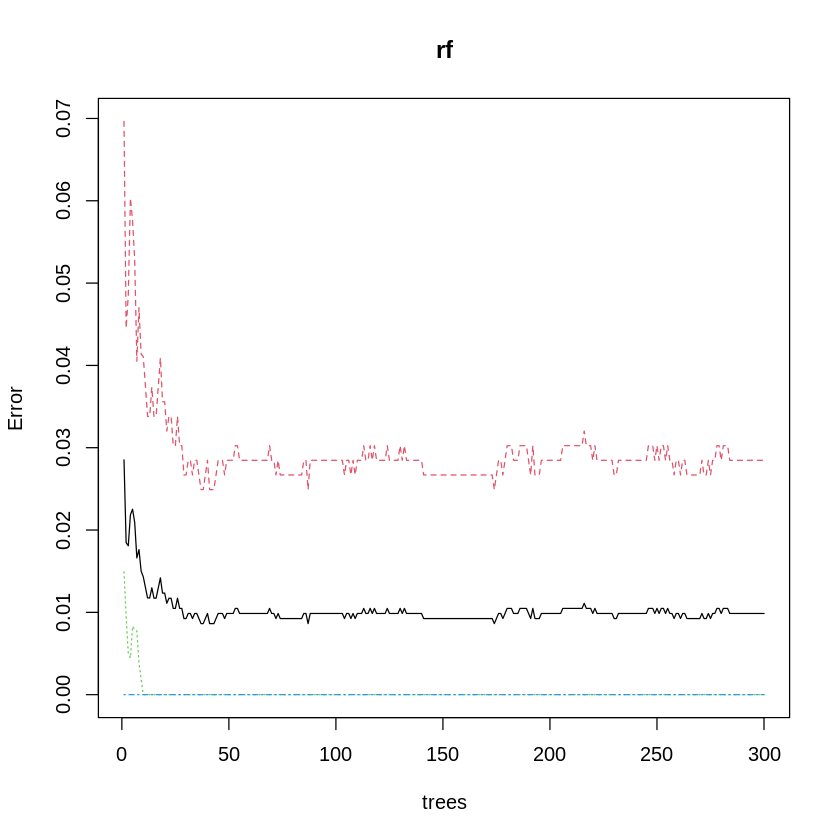

In [22]:
plot(rf)


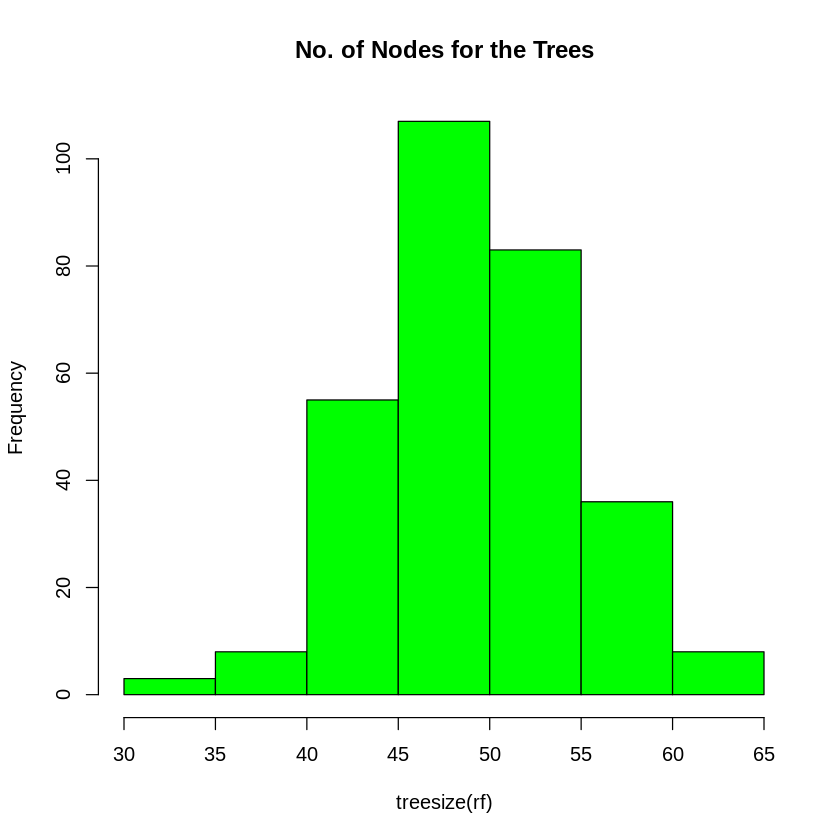

In [23]:
#Histogram
hist(treesize(rf),main = "No. of Nodes for the Trees",col = "green")


,MeanDecreaseGini
baseline.value,60.003791
accelerations,137.783162
fetal_movement,15.996513
uterine_contractions,23.191382
light_decelerations,3.395901
severe_decelerations,0.000000
prolongued_decelerations,24.793961
abnormal_short_term_variability,276.610223
mean_value_of_short_term_variability,53.211456
percentage_of_time_with_abnormal_long_term_variability,62.315533


[1]  854  782  371  812  182    0  167 1808  707 1166 1150  805  829  912  507
[16]    0  718  976 1091  586  172

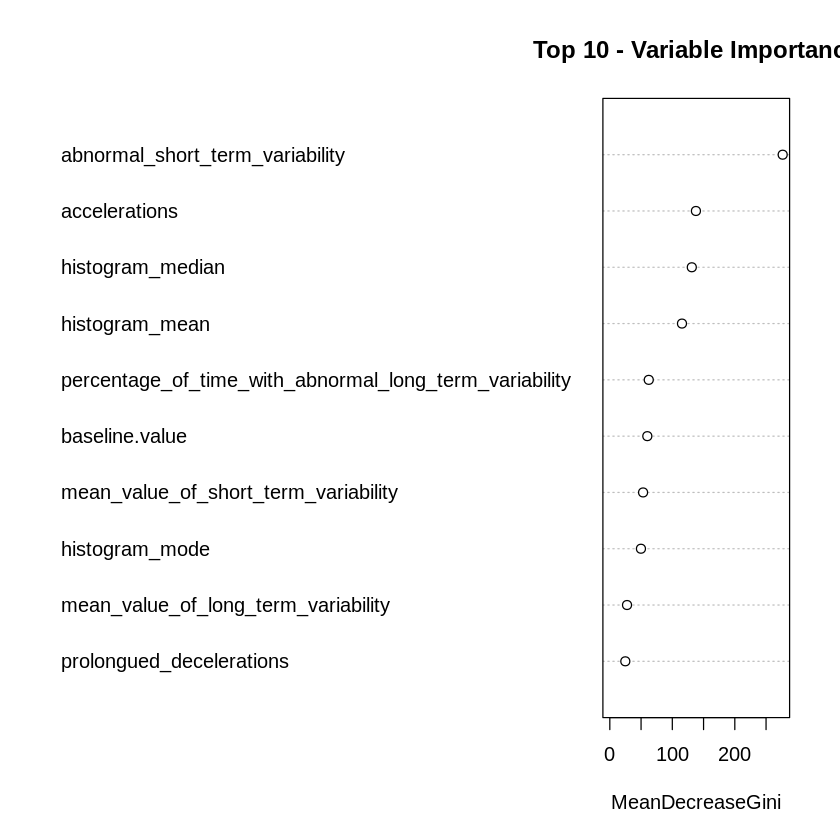

In [24]:
# Variable Importance
varImpPlot(rf,sort = T,n.var = 10,main = "Top 10 - Variable Importance")
importance(rf)
varUsed(rf)


#Naive Bayes

In [25]:
#Naive Bayes----
library(e1071)
nb=naiveBayes(fetal_health ~ ., data = datar_train)
pred=predict(nb,datar_test)
print(attributes(nb))


$names
[1] "apriori"   "tables"    "levels"    "isnumeric" "call"     

$class
[1] "naiveBayes"



###Confusion Matrix

In [26]:
#Confusion Matrix
cm=table(datar_test$fetal_health,pred)
print(cm)
print(confusionMatrix(cm))

   pred
      1   2   3
  1 254  49  24
  2   7 304   9
  3   0  88 204
Confusion Matrix and Statistics

   pred
      1   2   3
  1 254  49  24
  2   7 304   9
  3   0  88 204

Overall Statistics
                                        
               Accuracy : 0.8115        
                 95% CI : (0.785, 0.836)
    No Information Rate : 0.4696        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.7164        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9732   0.6893   0.8608
Specificity            0.8923   0.9679   0.8746
Pos Pred Value         0.7768   0.9500   0.6986
Neg Pred Value         0.9886   0.7787   0.9490
Prevalence             0.2780   0.4696   0.2524
Detection Rate         0.2705   0.3237   0.2173
Detection Prevalence   0.3482   0.3408   0.3110
Balanced Accuracy      0.93

#XGBoost


In [27]:
#XGBoost----
library(xgboost)
#Train-Test split acc to XGBoost
y_train=as.factor(datar_train$fetal_health)
y_test=as.factor(datar_test$fetal_health)
x_train=as.matrix(datar_train[,1:21])
x_test=as.matrix(datar_test[,1:21])
xgboost_train = xgb.DMatrix(data=x_train, label=y_train)
xgboost_test  = xgb.DMatrix(data=x_test, label=y_test)

In [28]:
#define watchlist
watchlist = list(train=xgboost_train, test=xgboost_test)
model = xgb.train(data = xgboost_train, max.depth = 5, watchlist=watchlist, nrounds = 500)

[1]	train-rmse:1.190792	test-rmse:1.180947 
[2]	train-rmse:0.846599	test-rmse:0.839729 
[3]	train-rmse:0.603126	test-rmse:0.599703 
[4]	train-rmse:0.434437	test-rmse:0.435431 
[5]	train-rmse:0.319493	test-rmse:0.325222 
[6]	train-rmse:0.242438	test-rmse:0.253441 
[7]	train-rmse:0.187518	test-rmse:0.207708 
[8]	train-rmse:0.152009	test-rmse:0.180602 
[9]	train-rmse:0.126201	test-rmse:0.160086 
[10]	train-rmse:0.106773	test-rmse:0.149034 
[11]	train-rmse:0.095730	test-rmse:0.142993 
[12]	train-rmse:0.089347	test-rmse:0.139192 
[13]	train-rmse:0.083419	test-rmse:0.135045 
[14]	train-rmse:0.076105	test-rmse:0.132862 
[15]	train-rmse:0.069558	test-rmse:0.130624 
[16]	train-rmse:0.068121	test-rmse:0.130334 
[17]	train-rmse:0.065258	test-rmse:0.129498 
[18]	train-rmse:0.064532	test-rmse:0.129506 
[19]	train-rmse:0.061302	test-rmse:0.128457 
[20]	train-rmse:0.058175	test-rmse:0.127403 
[21]	train-rmse:0.056084	test-rmse:0.126521 
[22]	train-rmse:0.053660	test-rmse:0.126136 
[23]	train-rmse:0.0

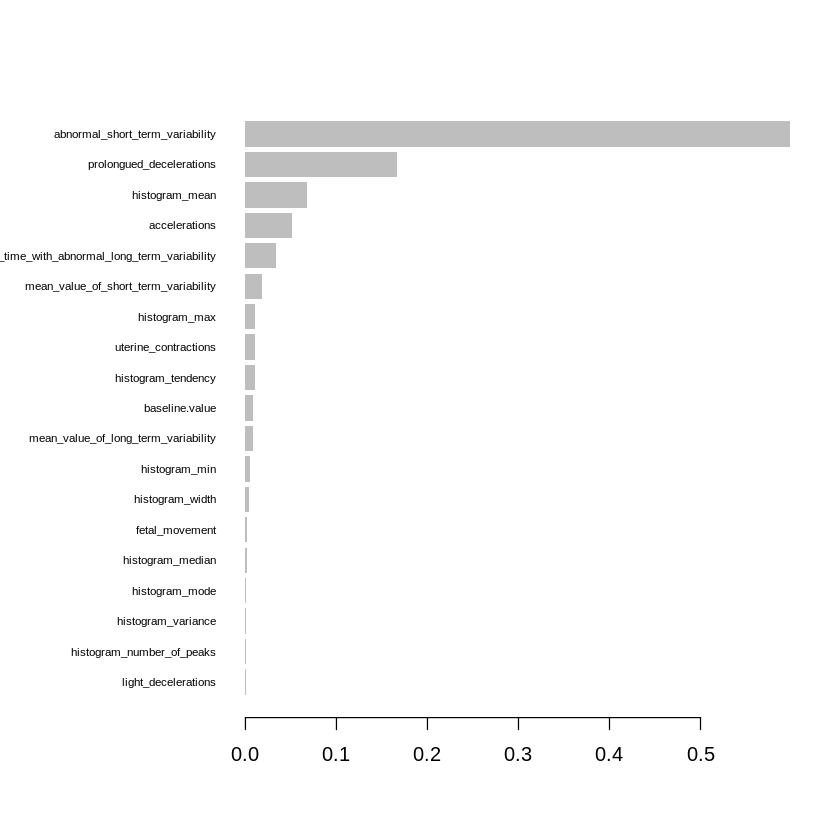

In [29]:
#RMSE is min at 95,after which it starts increasing indicating overfitting
final_model = xgboost(data = xgboost_train, max.depth = 5, nrounds = 335, verbose = 0)
pred_test = predict(final_model, xgboost_test)
importance_matrix <- xgb.importance(names(x_train), model = final_model)
xgb.plot.importance(importance_matrix)

In [30]:
#min & max (pred_test) then factorization for confusion matrix
pred_test[pred_test>0.4 & pred_test<1.2]=1
pred_test[pred_test>1.2 & pred_test<2.1]=2
pred_test[pred_test>2.1 & pred_test<3.1]=3


###Confusion Matrix

In [31]:
#Confusion Matrix
cm1=table(pred_test,y_test)
print(cm1)
print(confusionMatrix(as.factor(pred_test),as.factor(y_test)))

         y_test
pred_test   1   2   3
        1 305   0   0
        2  21 320   0
        3   1   0 292
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 305   0   0
         2  21 320   0
         3   1   0 292

Overall Statistics
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9647, 0.9853)
    No Information Rate : 0.3482          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9648          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9327   1.0000   1.0000
Specificity            1.0000   0.9661   0.9985
Pos Pred Value         1.0000   0.9384   0.9966
Neg Pred Value         0.9653   1.0000   1.0000
Prevalence             0.3482   0.3408   0.3110
Detection Rate         0.3248   0